In [ ]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np 

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_samples, silhouette_score

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

! pip install scikit-plot
import scikitplot as skplt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone B3/Data/merged_df.csv')
df.head(3)

,Quesh,Quesh Date,Total Respo,Avg Rating,sent,charcount
0,Which movie is the most quotable?,10/3/2021,8,4.75,-0.375000,46.625000
1,Homemade Tacos or Restaurant Tacos?,10/4/2021,10,4.60,0.300000,38.200000
2,Who has been your best teacher and why?,10/5/2021,18,4.50,5.944444,202.777778


In [ ]:
# reset the index
df.index = df.Quesh # reset the index  

# remove the model column 
df.drop(columns='Quesh', inplace=True)
df.drop(columns='Quesh Date', inplace=True)
# make sure the model doesnt exist -- just a numeric dataframe



In [ ]:
# standerized 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.shape

(97, 4)

In [ ]:
# cluster row 
hc1 = linkage(df_scaled, method='complete')
hc1

array([[ 55.        ,  94.        ,   0.24944203,   2.        ],
       [ 53.        ,  90.        ,   0.28317584,   2.        ],
       [ 18.        ,  38.        ,   0.31316485,   2.        ],
       [ 61.        ,  82.        ,   0.38980443,   2.        ],
       [ 49.        ,  98.        ,   0.39295695,   3.        ],
       [ 28.        ,  33.        ,   0.40923502,   2.        ],
       [ 56.        ,  58.        ,   0.41922902,   2.        ],
       [ 30.        ,  39.        ,   0.44920895,   2.        ],
       [ 68.        ,  74.        ,   0.46715391,   2.        ],
       [ 45.        ,  99.        ,   0.49554571,   3.        ],
       [ 44.        ,  87.        ,   0.52430614,   2.        ],
       [ 12.        ,  13.        ,   0.53539815,   2.        ],
       [ 51.        ,  86.        ,   0.53785401,   2.        ],
       [ 70.        ,  77.        ,   0.55044486,   2.        ],
       [ 21.        ,  35.        ,   0.55584042,   2.        ],
       [ 25.        ,  47

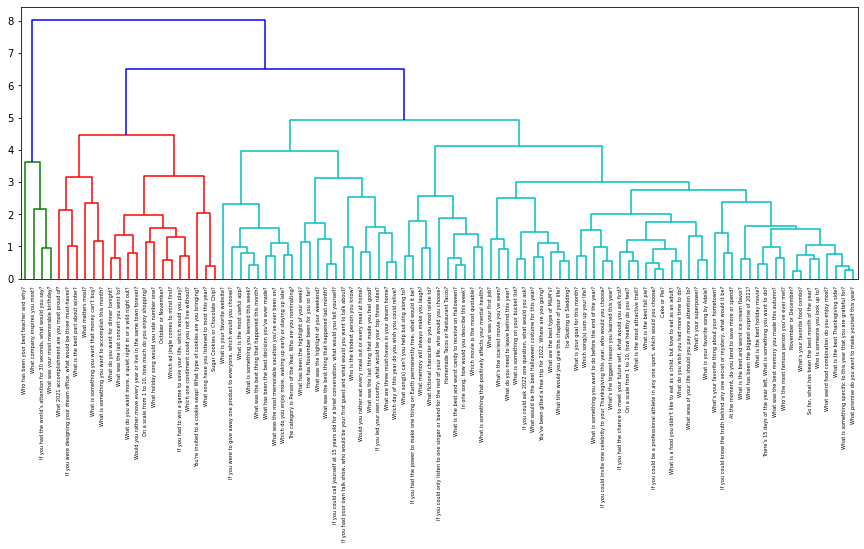

In [ ]:
plt.figure(figsize=(15,5))
dendrogram(hc1, labels=df.index)
plt.show()

In [ ]:
# extract 3 cluster
df['cluster'] = fcluster(hc1, 3, criterion='maxclust')
df.sample(5)

,Total Respo,Avg Rating,sent,charcount,cluster
Quesh,,,,,
What is the best and worst candy to receive on Halloween?,11,4.45,0.818182,42.181818,3
You've been gifted a free trip for 2022. Where are you going?,17,4.12,0.823529,41.176471,3
Which one condiment could you not live without?,18,3.78,0.722222,50.055556,2
What title would you give this chapter of your life?,18,4.17,0.277778,25.500000,3
"If you could invite one celebrity to your Thanksgiving this year, who would you choose?",17,4.29,1.176471,62.000000,3


In [ ]:
df.groupby(by='cluster').count()

,Total Respo,Avg Rating,sent,charcount
cluster,,,,
1,4,4,4,4
2,19,19,19,19
3,74,74,74,74


In [ ]:
df.groupby(by='cluster').mean()

,Total Respo,Avg Rating,sent,charcount
cluster,,,,
1,10.500000,4.420000,4.829861,156.065278
2,21.842105,3.719474,1.404906,54.825140
3,13.310811,4.152027,1.551918,63.491886


In [12]:
df.to_csv('hcluster.csv')